<a href="https://colab.research.google.com/github/ykpdev/DeepLearning/blob/main/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


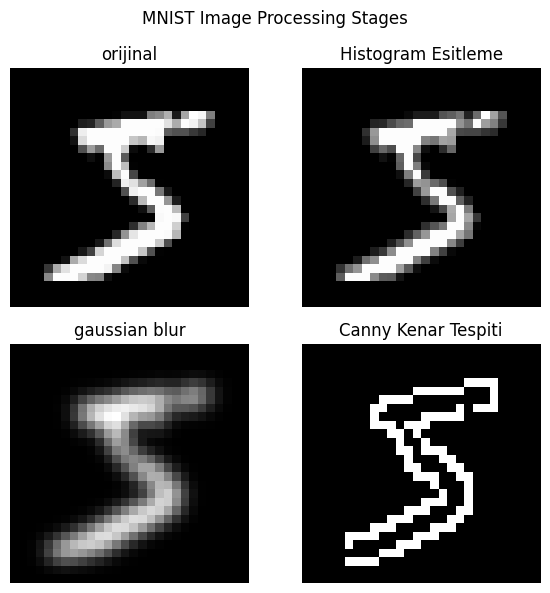

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 - 2s - 8ms/step - accuracy: 0.6306 - loss: 1.1371 - val_accuracy: 0.8020 - val_loss: 0.6383
Epoch 2/10
313/313 - 1s - 3ms/step - accuracy: 0.8234 - loss: 0.5647 - val_accuracy: 0.8365 - val_loss: 0.5105
Epoch 3/10
313/313 - 1s - 3ms/step - accuracy: 0.8660 - loss: 0.4273 - val_accuracy: 0.8610 - val_loss: 0.4574
Epoch 4/10
313/313 - 2s - 6ms/step - accuracy: 0.8851 - loss: 0.3626 - val_accuracy: 0.8625 - val_loss: 0.4429
Epoch 5/10
313/313 - 2s - 5ms/step - accuracy: 0.8999 - loss: 0.3069 - val_accuracy: 0.8735 - val_loss: 0.4165
Epoch 6/10
313/313 - 1s - 4ms/step - accuracy: 0.9144 - loss: 0.2699 - val_accuracy: 0.8820 - val_loss: 0.3989
Epoch 7/10
313/313 - 1s - 4ms/step - accuracy: 0.9219 - loss: 0.2382 - val_accuracy: 0.8870 - val_loss: 0.3759
Epoch 8/10
313/313 - 1s - 4ms/step - accuracy: 0.9356 - loss: 0.2028 - val_accuracy: 0.8765 - val_loss: 0.4053
Epoch 9/10
313/313 - 1s - 4ms/step - accuracy: 0.9393 - loss: 0.1911 - val_accuracy: 0.8870 - val_loss: 0.3882
E

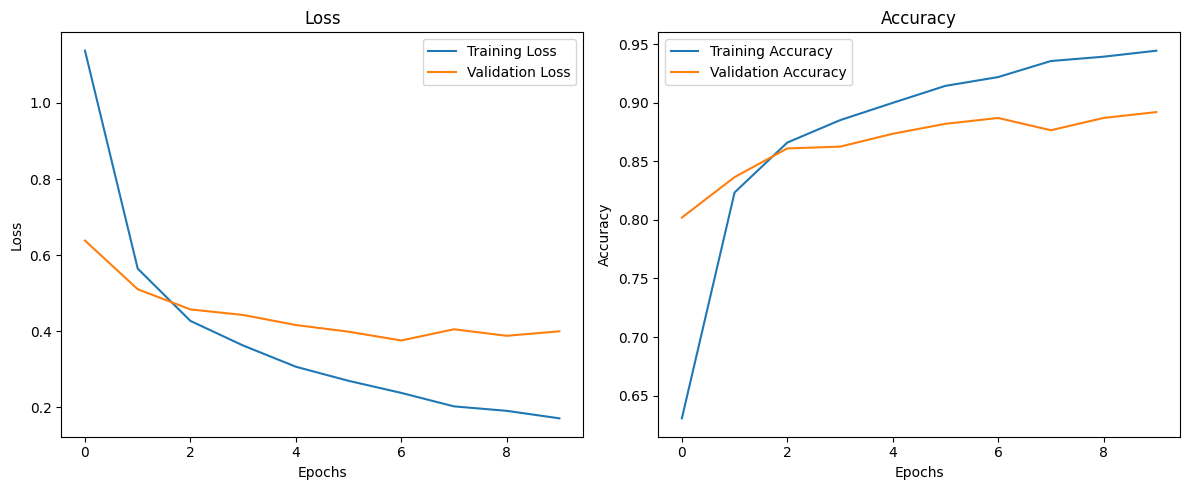

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# load mnist datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# image preprocessing
img = x_train[0] # ilk resmi al (MNIST veri setinden ilk resmi alıyor)
stages = {"orijinal": img}

# histogram esitleme
eq = cv2.equalizeHist(img) # histogram esitleme (Kontrastı artırmak için)
stages["Histogram Esitleme"] = eq

# gaussian blur: gurultuyu azaltma
blur = cv2.GaussianBlur(eq, (5,5), 0) # Gürültüyü (noise) azaltmak için bulanıklık filtresi uygular
stages["gaussian blur"] = blur

# canny ile kenar tespiti
edges = cv2.Canny(blur, 50, 150) # Canny algoritması ile kenar tespiti yapar
stages["Canny Kenar Tespiti"] = edges

# gorsellestirme
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
axes = axes.flat

for ax, (title, im) in zip(axes, stages.items()):
    ax.imshow(im, cmap = "gray")
    ax.set_title(title)
    ax.axis("off")

plt.suptitle("MNIST Image Processing Stages")
plt.tight_layout()
plt.show()
# preprocessing fonksiyonu
def preprocess_image(img):
    """
    - histogram esitleme
    - gaussian blur
    - canny ile kenar tespiti
    - flattering: 28x28 boyutundan 784 boyutuna cevirme
    - normalizasyon: 0-255 arasindan 0-1 arasina cevirme
    """
    img_eq = cv2.equalizeHist(img) # histogram esitleme
    img_blur = cv2.GaussianBlur(img_eq, (5, 5), 0) # gaussian blur
    img_edges = cv2.Canny(img_blur, 50, 150) # canny kenar tespiti
    features = img_edges.flatten() / 255.0 # flattering: 28x28 boyutundan 784 boyutuna cevirme
    return features

num_train = 10000
num_test = 2000
X_train = np.array([preprocess_image(img) for img in x_train[:num_train]])
y_train_sub = y_train[:num_train]

X_test = np.array([preprocess_image(img) for img in x_test[:num_test]])
y_test_sub = y_test[:num_test]

# ann model creation
model = Sequential([
    Dense(128, activation = "relu", input_shape = (784,)), # ilk katman, 128 nöron 28x28 = 784 boyutunda
    Dropout(0.5), # dropout katmani, overfitting'i azaltmak için, %50 dropout
    Dense(64, activation = "relu"), # ikinci katman, 64 nöron
    Dense(10, activation = "softmax") # cikis katmani, 10 nöron (0-9 rakamlari icin)
])

# compile model
model.compile(
    optimizer = Adam(learning_rate = 0.001), # optimizer
    loss = "sparse_categorical_crossentropy", # kayip fonksiyonu
    metrics = ["accuracy"] # metrikler
)

model.summary()

# 1. MODEL EĞİTİMİ (Training)
# ann model training
history = model.fit(
    X_train, y_train_sub,
    validation_data = (X_test, y_test_sub),
    epochs = 10, # epoch sayisi
    batch_size = 32, # batch boyutu
    verbose = 2 # Her epoch sonunda çıktı gösterir
)

# 2. MODEL DEĞERLENDİRME (Evaluation)
test_loss, test_acc = model.evaluate(X_test, y_test_sub, verbose=0)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

# 3. EĞİTİM GEÇMİŞİNİ GÖRSELLEŞTİRME (Plotting)
# plot training history
plt.figure(figsize = (12, 5))

# Kayıp (Loss) Grafiği - Sol Taraf
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Doğruluk (Accuracy) Grafiği - Sağ Taraf
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()